1、采用Kmeans算法实现2D数据自动聚类，预测V1=80,V2=60数据类别；

2、计算预测准确率，完成结果矫正

3、采用KNN、Meanshift算法，重复步骤1-2

数据：data.csv

In [1]:
# load the data
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
data.head()

,V1,V2,labels
0,2.072345,-3.241693,0
1,17.936710,15.784810,0
2,1.083576,7.319176,0
3,11.120670,14.406780,0
4,23.711550,2.557729,0


In [3]:
# define x and y 
X  = data.drop(['labels'],axis=1) 
y = data.loc[:,'labels']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: labels, dtype: int64

In [4]:
pd.value_counts(y)

2    1156
1     954
0     890
Name: labels, dtype: int64

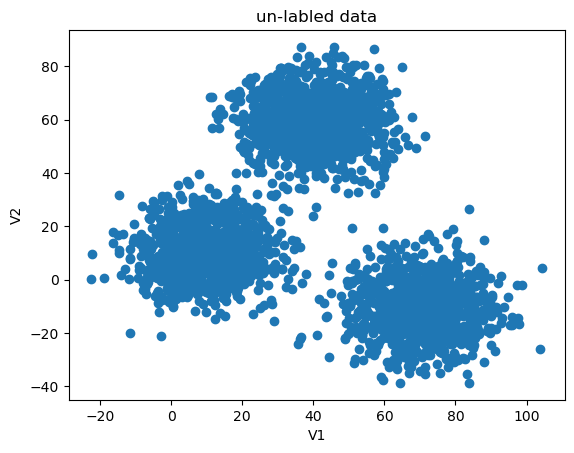

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig1 = plt.figure()
plt.scatter(X.loc[:,'V1'],X.loc[:,'V2'])
plt.title("un-labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

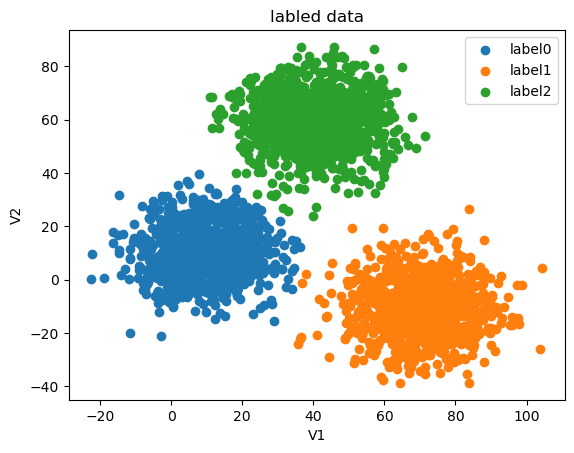

In [6]:
fig1 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.show()

In [7]:
# set the model
from sklearn.cluster import KMeans
KM = KMeans(n_clusters=3,random_state=0)
KM.fit(X)

d:\anaconda\envs\dd\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
Exception in thread Thread-5:
Traceback (most recent call last):
  File "d:\anaconda\envs\dd\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "d:\anaconda\envs\dd\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "d:\anaconda\envs\dd\lib\subprocess.py", line 1495, in _readerthread
    buffer.append(fh.read())
  File "d:\anaconda\envs\dd\lib\codecs.py", line 322, in decode
    (result, consumed) = self._buffer_decode(data, self.errors, final)
UnicodeDecodeError: 'utf-8' codec can't decode byte 0xc0 in position 24: invalid start byte
d:\anaconda\envs\dd\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physi

KMeans(n_clusters=3, random_state=0)

In [8]:
centers = KM.cluster_centers_

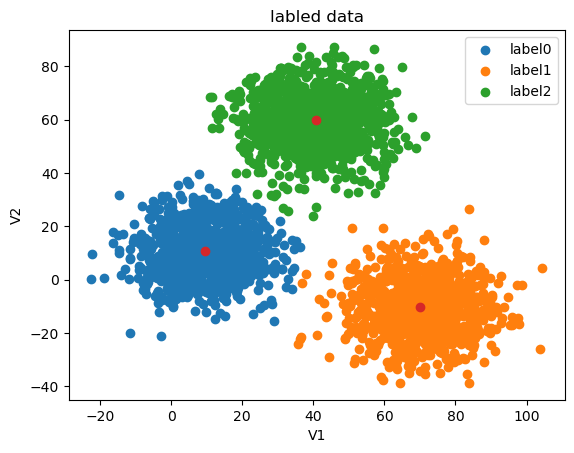

In [9]:
fig3 = plt.figure()
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [10]:
#test data: V1=80,V2=60
y_predict_test = KM.predict([[80,60]])
print(y_predict_test)

[0]


d:\anaconda\envs\dd\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [11]:
# predict based on training data
y_predict = KM.predict(X)
print(pd.value_counts(y_predict),pd.value_counts(y))

0    1149
1     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [12]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y,y_predict)
print(accuracy)

0.31966666666666665


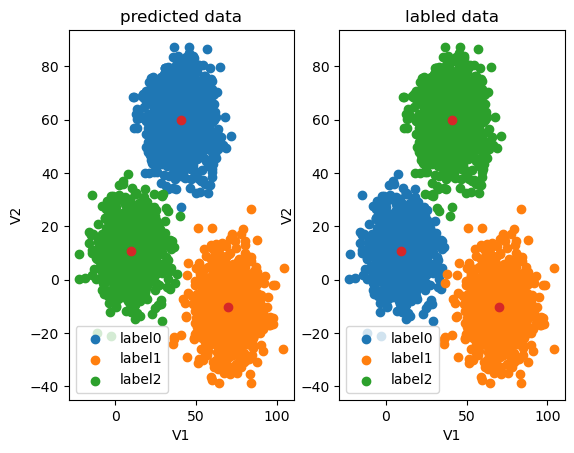

In [14]:
#visualize the data and results
fig4 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict==0],X.loc[:,'V2'][y_predict==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict==1],X.loc[:,'V2'][y_predict==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict==2],X.loc[:,'V2'][y_predict==2])

plt.title("predicted data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig5 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [20]:
# correct the results
y_corrected = []
for i in y_predict:
    if i == 0 : 
        y_corrected.append(2)
    elif i == 1:
        y_corrected.append(1)
    else:
        y_corrected.append(0)
print(pd.value_counts(y_corrected),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [21]:
print(accuracy_score(y,y_corrected))

0.997


In [24]:
print(type(y_corrected))

<class 'numpy.ndarray'>


In [23]:
y_corrected = np.array(y_corrected)
print(type(y_corrected))

<class 'numpy.ndarray'>


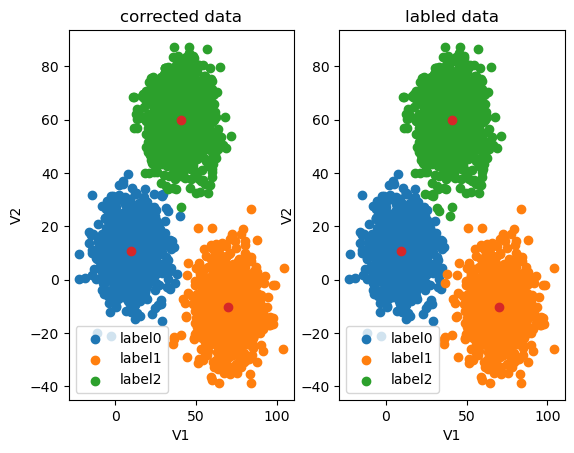

In [25]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected==0],X.loc[:,'V2'][y_corrected==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected==1],X.loc[:,'V2'][y_corrected==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected==2],X.loc[:,'V2'][y_corrected==2])

plt.title("corrected data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [27]:
#establish a KNN model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X,y)

KNeighborsClassifier(n_neighbors=3)

In [28]:
#predict based on the test data V1=80, V2=60
y_predict_knn_test = KNN.predict([[80,60]])
y_predict_knn = KNN.predict(X)
print(y_predict_knn_test)
print('knn accuracy:',accuracy_score(y,y_predict_knn))

[2]
knn accuracy: 1.0


d:\anaconda\envs\dd\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [29]:
print(pd.value_counts(y_predict_knn),pd.value_counts(y))

2    1156
1     954
0     890
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


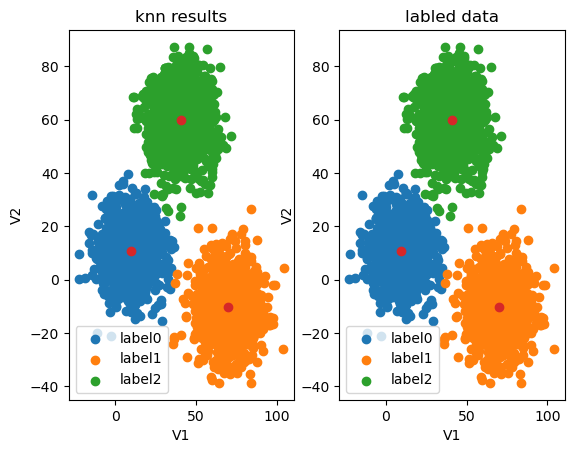

In [30]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_knn==0],X.loc[:,'V2'][y_predict_knn==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_knn==1],X.loc[:,'V2'][y_predict_knn==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_knn==2],X.loc[:,'V2'][y_predict_knn==2])

plt.title("knn results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [31]:
#try meanshift model
from sklearn.cluster import MeanShift,estimate_bandwidth
#obtain the bandwidth
bw = estimate_bandwidth(X,n_samples=500)
print(bw)

30.84663454820215


In [32]:
#establish the meanshift model-un-supervised model
ms = MeanShift(bandwidth=bw)
ms.fit(X)

MeanShift(bandwidth=30.84663454820215)

In [33]:
y_predict_ms = ms.predict(X)
print(pd.value_counts(y_predict_ms),pd.value_counts(y))

0    1149
1     952
2     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


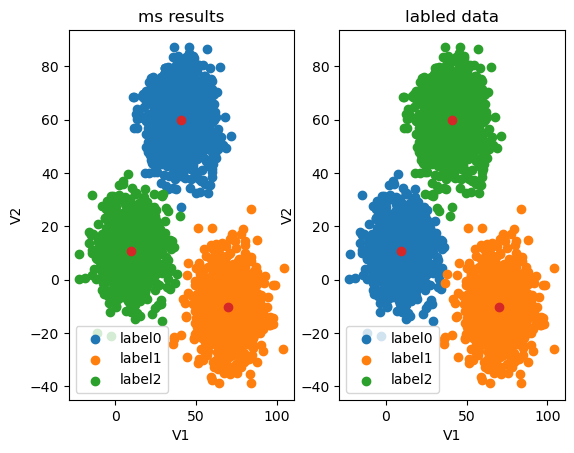

In [34]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_predict_ms==0],X.loc[:,'V2'][y_predict_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_predict_ms==1],X.loc[:,'V2'][y_predict_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_predict_ms==2],X.loc[:,'V2'][y_predict_ms==2])

plt.title("ms results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

In [35]:
#correct the results
y_corrected_ms = []
for i in y_predict_ms:
    if i==0:
        y_corrected_ms.append(2)
    elif i==1:
        y_corrected_ms.append(1)
    else:
        y_corrected_ms.append(0)
print(pd.value_counts(y_corrected_ms),pd.value_counts(y))

2    1149
1     952
0     899
dtype: int64 2    1156
1     954
0     890
Name: labels, dtype: int64


In [36]:
#convert the results to numpy array
y_corrected_ms = np.array(y_corrected_ms)
print(type(y_corrected_ms))

<class 'numpy.ndarray'>


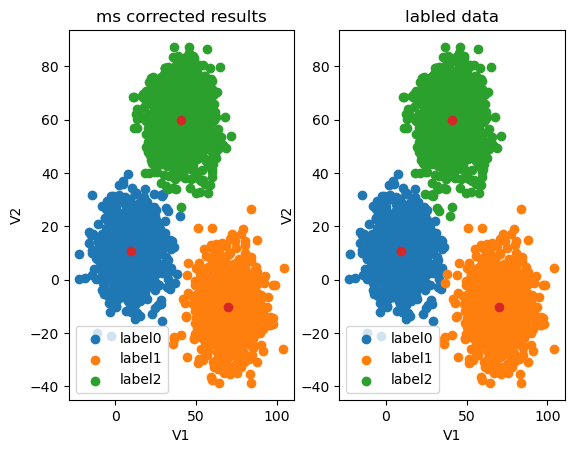

In [37]:
fig6 = plt.subplot(121)
label0 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==0],X.loc[:,'V2'][y_corrected_ms==0])
label1 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==1],X.loc[:,'V2'][y_corrected_ms==1])
label2 = plt.scatter(X.loc[:,'V1'][y_corrected_ms==2],X.loc[:,'V2'][y_corrected_ms==2])

plt.title("ms corrected results")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])

fig7 = plt.subplot(122)
label0 = plt.scatter(X.loc[:,'V1'][y==0],X.loc[:,'V2'][y==0])
label1 = plt.scatter(X.loc[:,'V1'][y==1],X.loc[:,'V2'][y==1])
label2 = plt.scatter(X.loc[:,'V1'][y==2],X.loc[:,'V2'][y==2])

plt.title("labled data")
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend((label0,label1,label2),('label0','label1','label2'))
plt.scatter(centers[:,0],centers[:,1])
plt.show()

kmeans\knn\meanshift
kmeans\meanshift: un-supervised, training data: X;kmeans: category number; meanshift: calculate the bandwidth
knn: supervised; training data: X\y